# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [260]:
# only library allowed do not modify
from src.sql import execute_query

In [261]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM train_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,7484,9996,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,train
1,1,3593,2338,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,train
2,2,12246,5091,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,train
3,3,5237,10266,None,16-03-2020,My food stock is not the only one which is emp...,Positive,train
4,4,14067,3014,None,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,train
...,...,...,...,...,...,...,...,...
41152,41152,10280,14781,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,train
41153,41153,10605,1158,None,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,train
41154,41154,4884,1029,None,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,train
41155,41155,9052,7736,None,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,train


In [8]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,5663,6254,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,test
1,1,12784,7766,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,test
2,2,3859,7150,None,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,test
3,3,6815,9068,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,test
4,4,1381,8708,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,test
...,...,...,...,...,...,...,...,...
3793,3793,7916,11906,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,test
3794,3794,14679,3726,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,test
3795,3795,6342,3112,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,test
3796,3796,13676,1776,None,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,test


## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [262]:
# write query inside docstring
query_1 = ("""   
       
        SELECT LOCATION, COUNT(LOCATION) AS CANT_T 
        FROM train_table
        GROUP BY LOCATION

        ORDER BY 2 DESC LIMIT 10

        
""")

In [263]:
result_1 = execute_query(query_1)

In [214]:
result_1

,Location,CANT_T
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


## Question 2: Intermediate SQL


In [264]:
# write query inside docstring
query_2 = ("""
                
        SELECT  USERNAME,
        COUNT(CASE WHEN SENTIMENT='Positive'  THEN 1 ELSE 0 END) pos_count,
        COUNT(CASE WHEN SENTIMENT='Negative'  THEN 1 ELSE 0 END) neg_count,
        COUNT(CASE WHEN SENTIMENT='Extremely Positive'  THEN 1 ELSE 0 END) extremely_pos_count,
        COUNT(CASE WHEN SENTIMENT='Extremely Negative'  THEN 1 ELSE 0 END) extremely_neg_count   
        FROM test_table  
        group by username
    """)

In [265]:
result_2 = execute_query(query_2)

In [266]:
result_2

,UserName,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,8,1,1,1,1
1,9,2,2,2,2
2,16,1,1,1,1
3,28,1,1,1,1
4,36,1,1,1,1
...,...,...,...,...,...
3360,14961,1,1,1,1
3361,14970,1,1,1,1
3362,14979,1,1,1,1
3363,14983,1,1,1,1


## Question 3: Medium SQL

In [267]:
# write query inside docstring
query_3 = ("""

           with cant as 
           (
            SELECT  TweetAt,
            sum(CASE WHEN SENTIMENT='Positive'  THEN 1.000000 else 0.000000 END) pos_count,
            sum(CASE WHEN SENTIMENT='Negative'  THEN 1.000000 ELSE 0.000000 END) neg_count,
            sum(CASE WHEN SENTIMENT='Extremely Positive'  THEN 1.000000 ELSE 0.000000 END) extremely_pos_count,
            sum(CASE WHEN SENTIMENT='Extremely Negative'  THEN 1.000000 ELSE 0.000000 END) extremely_neg_count   
            FROM test_table  
            group by TweetAt
           )

    select TweetAt,
    cast(((pos_count + extremely_pos_count) / ((neg_count + extremely_neg_count) + (pos_count + extremely_pos_count))) as decimal(4,6)) pos_rate
    from cant
    group by TweetAt
    
     
        """)

In [268]:
result_3 = execute_query(query_3)

In [269]:
result_3

,TweetAt,pos_rate
0,02-03-2020,0.500000
1,03-03-2020,1.000000
2,04-03-2020,0.500000
3,05-03-2020,0.800000
4,06-03-2020,1.000000
5,07-03-2020,0.285714
6,08-03-2020,0.285714
7,09-03-2020,0.428571
8,10-03-2020,0.468085
9,11-03-2020,0.563910


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

<AxesSubplot:>

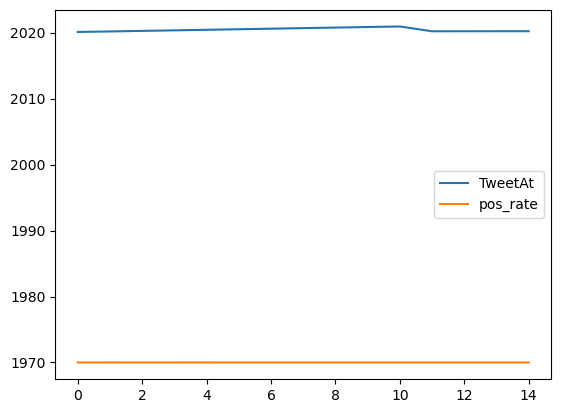

In [314]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.DataFrame(result_3)
df['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d')
#df2=df.mean()
#fig,ax=plt.subplots()
#df2.plt(x='TweetAt',y='post_rate',ax=ax)
#df2.plot()
df.plot()








In [313]:
plot(result_3)

NameError: name 'plot' is not defined

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5

In [1]:
import csv
nombre_archivo = "./data/malformed_dataset.csv "
with open(nombre_archivo, "r") as archivo:
     next (archivo,None)